In [59]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms


import time
import numpy as np
import matplotlib.pyplot as plt

In [60]:
epochs = 15
batch_size = 4
learning_rate = 0.001

In [61]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
    ])

In [62]:
# Fashion-mnist dataset 
trainset = torchvision.datasets.FashionMNIST(root='./data_new', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data_new', train=False, download=True, transform=transform)

# Dataloader
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size= 4, shuffle=False, num_workers=2)

In [63]:
classes = ['T-shirt', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag', 'AnkleBoot']

Image shape:torch.Size([4, 1, 28, 28])
Label shape:torch.Size([4])


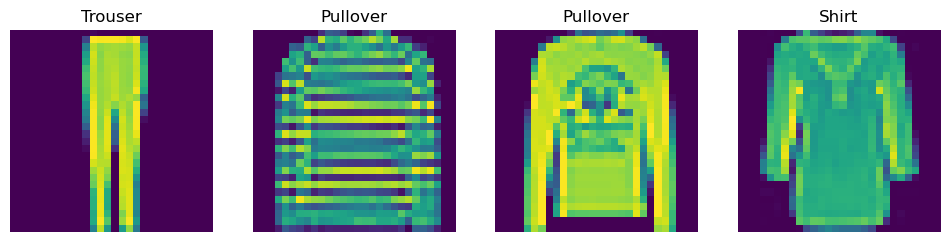

In [64]:
for batch_1 in trainloader:
    batch = batch_1
    break

print(f"Image shape:{batch[0].shape}") # Image pixels -> (batch, channel, height, width)
print(f"Label shape:{batch[1].shape}") # Label -> (batch, 1)

plt.figure(figsize=(12,10))
for i in range(batch[0].shape[0]):
    plt.subplot(1,4, i+1)
    plt.title(classes[batch[1][i]])
    plt.imshow(batch[0][i,0,:,:])
    plt.axis('off')
plt.show()

In [78]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, 
                               kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, 
                               kernel_size=5)
        self.fc1 = nn.Linear(in_features=256, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
model = CNN()
print(model)

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [79]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [80]:
# Loss Function
loss_fn = nn.CrossEntropyLoss()

optimizer = Adam(model.parameters(), lr=learning_rate)

In [81]:
def calc_acc(loader):
    correct = 0
    total = 0
    for data in loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return ((100 * correct)/ total)


In [82]:
def training():
    epoch_loss = []
    train_acc = []
    test_acc = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
    
            inputs, labels = data[0].to(device), data[1].to(device)
            
            optimizer.zero_grad()
            
            outputs = net(inputs)
            
            loss = loss_fn(outputs, labels)
            
            loss.backward()
            
            optimizer.step()
            
            running_loss += loss.item()
            
        epoch_loss.append(running_loss)
        train_acc.append(calc_acc(trainloader))
        test_acc.append(calc_acc(testloader))
        print('Epoch: %d of %d, Train Acc: %0.3f, Test Acc: %0.3f, Loss: %0.3f'
              % (epoch+1, epochs, train_acc[epoch], test_acc[epoch], running_loss/15000))
        
    return epoch_loss, train_acc, test_acc
            
    

In [ ]:
start = time.time()
epoch_loss, train_acc, test_acc = training()
end = time.time()

print("%0.2f Minutes" %((end-start)/60))

Epoch: 1 of 15, Train Acc: 93.027, Test Acc: 88.930, Loss: 0.184
Epoch: 2 of 15, Train Acc: 93.027, Test Acc: 88.930, Loss: 0.184
Epoch: 3 of 15, Train Acc: 93.027, Test Acc: 88.930, Loss: 0.184
Epoch: 4 of 15, Train Acc: 93.027, Test Acc: 88.930, Loss: 0.184


In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.plot(epoch_loss)
plt.title("Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,3,2)
plt.plot(train_acc)
plt.title("Train Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')

plt.subplot(1,3,3)
plt.plot(test_acc)
plt.title("Testing Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.show()